In [13]:
import numpy as np  
seed = 7
np.random.seed(seed)

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
import pandas as pd
import pandas
import numpy as np

NUM_FEATURES = 31
 
dataframe_ny = pandas.read_csv("data/features_feb7_ny_counts-updated-.csv", header=0)
established_ny = dataframe_ny[dataframe_ny.stable==1] # established 
new_ny = dataframe_ny[dataframe_ny.stable==0] # new

dataframe_sg = pandas.read_csv("data/features_feb5_both.csv", header=0)
established_sg = dataframe_sg[dataframe_sg.stable==1] # established 
new_sg = dataframe_sg[dataframe_sg.stable==0] # new

dataframe_lon = pandas.read_csv("data/features_feb7_both_london.csv", header=0)
established_lon = dataframe_lon[dataframe_lon.stable==1] # established 
new_lon = dataframe_lon[dataframe_lon.stable==0] # new

dataframe_paris = pandas.read_csv("data/features_feb7_both_paris.csv", header=0)
established_paris = dataframe_paris[dataframe_paris.stable==1] # established 
new_paris = dataframe_paris[dataframe_paris.stable==0] # new


#dataframe = pd.concat([established_sg, established_ny, established_lon, established_paris], ignore_index=True) 
dataframe = pd.concat([new_sg, new_ny, new_lon, new_paris], ignore_index=True) 
 
# category 0 defines venues that closed 
# since we expect to have more venues that remained open than those that 
# closed, we select all of the closed venues and then a random sample of 
# opened venues of the same size, created balanced classes
class_one = dataframe[dataframe.label==0]
class_two = dataframe[dataframe.label==1].sample(n=len(class_one), replace=False)
dataset = pd.concat([class_one, class_two], ignore_index=True)
dataset = dataset.values 
 
X = dataset[:, 0:NUM_FEATURES]
y = dataset[:, NUM_FEATURES]
print len(class_one)

143


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# print the distribution of classes on train/test
print pd.value_counts(pd.Series(y_test), normalize=True)
print pd.value_counts(pd.Series(y_train), normalize=True)
print len(y_test), len(y_train)

1.0    0.5
0.0    0.5
dtype: float64
1.0    0.5
0.0    0.5
dtype: float64
58 228


In [159]:
from sklearn.linear_model import LogisticRegression

# logistic regression
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_LR = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_LR[:, 1]))
 
print (metrics.classification_report(y_test, predicted))

#logistic regression coefficients 
pd.concat([pd.DataFrame(dataframe.columns)[:-2],pd.DataFrame(np.transpose(clf.coef_))], axis = 1)

0.637931034483
0.667063020214
             precision    recall  f1-score   support

        0.0       0.67      0.55      0.60        29
        1.0       0.62      0.72      0.67        29

avg / total       0.64      0.64      0.64        58



,0,0
0,venue,0.193056
1,in_sur,-0.524912
2,out_sur,-0.140194
3,ratio_sur,-0.210920
4,in_raw,0.564214
5,out_raw,0.157652
6,ratio_raw,-0.161917
7,dist_sur_ent,0.025863
8,dist_sur_ent_std,0.302265
9,dis_sur_lea,0.638223


In [160]:
from sklearn import ensemble

# gradient boosting 
clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_GB = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.672413793103
0.749108204518
             precision    recall  f1-score   support

        0.0       0.68      0.66      0.67        29
        1.0       0.67      0.69      0.68        29

avg / total       0.67      0.67      0.67        58



In [161]:
from sklearn.dummy import DummyClassifier

# random baseline
clf = DummyClassifier(strategy='uniform')
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_random = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_random[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.465517241379
0.5
             precision    recall  f1-score   support

        0.0       0.47      0.52      0.49        29
        1.0       0.46      0.41      0.44        29

avg / total       0.47      0.47      0.46        58



In [162]:
from sklearn.svm import SVC

# svc
clf = SVC(probability=True)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_SVC = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.672413793103
0.749108204518
             precision    recall  f1-score   support

        0.0       0.66      0.72      0.69        29
        1.0       0.69      0.62      0.65        29

avg / total       0.67      0.67      0.67        58



In [163]:
from sklearn.ensemble import RandomForestClassifier

# random forest
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_RFC = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.637931034483
0.749108204518
             precision    recall  f1-score   support

        0.0       0.62      0.69      0.66        29
        1.0       0.65      0.59      0.62        29

avg / total       0.64      0.64      0.64        58



In [164]:
from sklearn.neural_network import MLPClassifier

# neural net 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_NN = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_NN[:, 1]))
 
print (metrics.classification_report(y_test, predicted))

0.689655172414
0.747919143876
             precision    recall  f1-score   support

        0.0       0.69      0.69      0.69        29
        1.0       0.69      0.69      0.69        29

avg / total       0.69      0.69      0.69        58



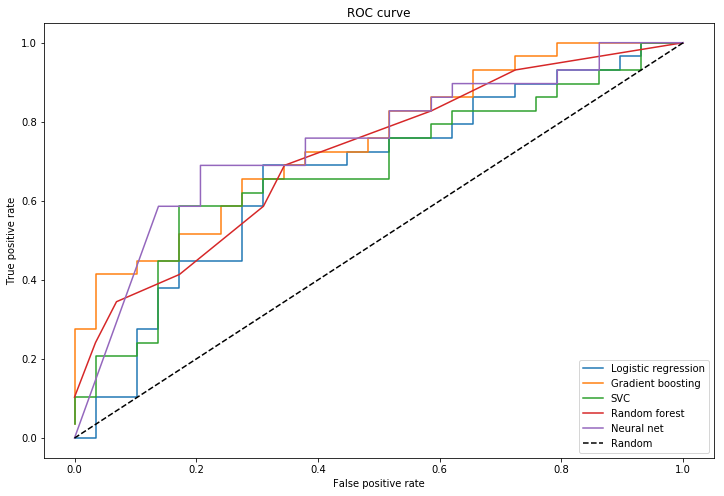

In [165]:
from matplotlib import pyplot as plt

# plot area under curve in order to compare multiple classifiers
fpr, tpr, _ = metrics.roc_curve(y_test, probs_LR[:, 1]) #classifier 1
fpr2, tpr2, _ = metrics.roc_curve(y_test, probs_GB[:, 1]) #classifier 2
fpr3, tpr3, _ = metrics.roc_curve(y_test, probs_SVC[:, 1]) #classifier 3
fpr4, tpr4, _ = metrics.roc_curve(y_test, probs_RFC[:, 1]) #classifier 3
fpr5, tpr5, _ = metrics.roc_curve(y_test, probs_NN[:, 1]) #classifier 3


fig = plt.figure(figsize=(12, 8)) #, dpi=100)

plt.plot(fpr,tpr, label='Logistic regression') 
plt.plot(fpr2,tpr2, label='Gradient boosting ')
plt.plot(fpr3,tpr3, label='SVC')
plt.plot(fpr4,tpr4, label='Random forest')
plt.plot(fpr5,tpr5, label='Neural net')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random')
plt.legend(loc="lower right") 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()